<a href="https://colab.research.google.com/github/abhinavagrawal1995/brown-datathon/blob/master/CDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brown Data Science - CDC analysis

The data is encoded with one record per line, which each line having exactly the same number of characters. Each variable has a fixed starting column and fixed length, so the same variable will be found in the exact same columns across each row. 
The starting position and length of each variable can be found [here](https://www.cdc.gov/brfss/annual_data/2017/llcp_varlayout_17_onecolumn.html).
The definition of each variable is [here](https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf).

In [2]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


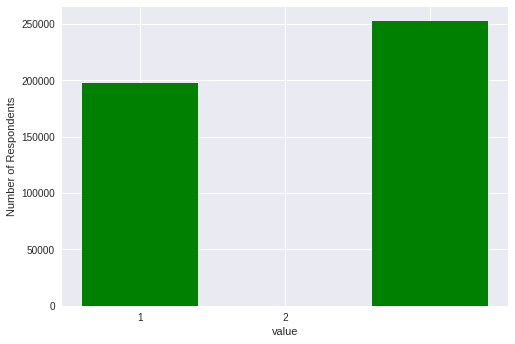

In [3]:
dfmonth = defaultdict(lambda: 0)
with open('/content/gdrive/My Drive/Brown Datathon Datasets/CDC/BRFSS2017.txt') as f:
    for line in f:
        val = line[63]  # The value of FMONTH for this row.
        dfmonth[val] += 1
    
plt.bar( dfmonth.keys(), dfmonth.values(), color='g')
plt.ylabel('Number of Respondents')
plt.xlabel('value')
plt.show()

In [0]:
# Now let us view the variable GENHLTH. 
# The survey question asks how would you rate your general health, and the answers are as follows:


dgenhlthlabels = {'1': 'Excellent', '2': 'Very Good', '3': 'Good', '4': 'Fair', '5': 'Poor', '7': 'Don\'t know/Not sure', '9': 'Refused'}

In [0]:
dgenhlth = defaultdict(lambda: 0)
with open('BRFSS2017.txt') as f:
    for line in f:
        val = line[89]  # The value of GENHLTH for this row.
        if val != ' ':  #  We choose to ignore values equal to the BLANK space although you may want to handle blank or missing data differently
            dgenhlth[dgenhlthlabels[val]] += 1

In [0]:
x = []
y = []
for k,v in dgenhlth.items():
    x.append(k)
    y.append(v)

In [0]:
colors = ['yellowgreen','red','gold','lightskyblue','violet','blue','darkgreen']
pct = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, pct)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()

TypeError: can't multiply sequence by non-int of type 'float'